In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

In [3]:
%matplotlib inline
# Load the Boston housing dataset
data = pd.read_csv('boston_housing.csv')
data.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24,1.1
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


In [4]:
 prices = data['24']

In [5]:
data.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24,1.1
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


In [6]:
import pandas as pd
df=pd.DataFrame(data)

In [7]:
df=df.rename(columns={"24": "MEDV","15.3":"PTRATIO","4.98":"LSTAT","6.575":"RM"})

In [8]:
df

,0.00632,18,2.31,0,0.538,RM,65.2,4.09,1,296,PTRATIO,396.9,LSTAT,MEDV,1.1
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,1
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,1
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,1


In [9]:
features=df[["RM","PTRATIO","LSTAT"]]
features
#Here, RM is average no of rooms
#PTRATIO is the pupil teacher ratio
#LSTAT is percentage of lower status population
#MEDV is the median value of homes
#Our aim is to predict MEDV using the features

,RM,PTRATIO,LSTAT
0,6.421,17.8,9.14
1,7.185,17.8,4.03
2,6.998,18.7,2.94
3,7.147,18.7,5.33
4,6.430,18.7,5.21
...,...,...,...
500,6.593,21.0,9.67
501,6.120,21.0,9.08
502,6.976,21.0,5.64
503,6.794,21.0,6.48


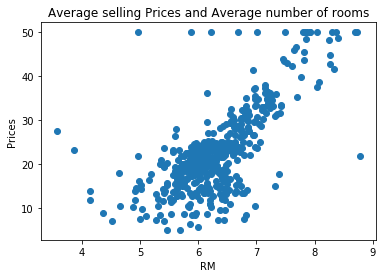

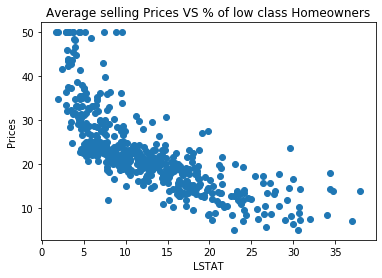

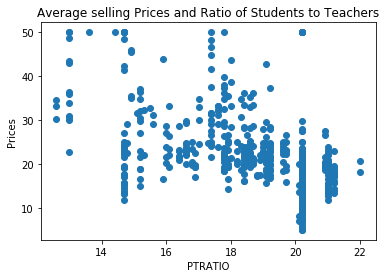

In [11]:
# fig=plt.figure()
# ax=fig.add_subplot(1, 1, 1)
import matplotlib.pyplot as plt
plt.scatter(df['RM'], df['MEDV']) 
#Lables & Title
plt.title("Average selling Prices and Average number of rooms")
plt.xlabel("RM")
plt.ylabel("Prices")
plt.show()

#                       LSTAT VS PRICES
# fig=plt.figure()
# ax=fig.add_subplot(1, 1, 1)
plt.scatter(df['LSTAT'], df['MEDV'])  
plt.title("Average selling Prices VS % of low class Homeowners")
plt.xlabel("LSTAT")
plt.ylabel("Prices")
plt.show()

#                       PTRATIO VS PRICES
# fig=plt.figure()
# ax=fig.add_subplot(1, 1, 1)
plt.scatter(df['PTRATIO'], df['MEDV'])  
plt.title("Average selling Prices and Ratio of Students to Teachers")
plt.xlabel("PTRATIO")
plt.ylabel("Prices")
plt.show()

We see that as number of rooms (RM) increases, prices increase.
As LSTAT(lower status people) percentage increases, the price decreases
For a higher PTRATIO(pupil-teacher ratio), price tends to decrease

For performance evaluation, we use R2 score which gives a value between 0 and 1. A value between them indicates what percent of target variable can be explained by the features.

In [12]:
from sklearn.metrics import r2_score
#We will calcukate the performance of y_pred by y_true
def performance_metric(y_true, y_predict):
    score = r2_score(y_true,y_predict)
    return score

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)
print("Dataset is split into training and testing")

Dataset is split into training and testing


The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. The ShuffleSplit() is used for cross validation and will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set.
make_scorer wraps scoring functions for use in GridSearchCV and cross_val_score. It takes a score function, such as accuracy_score, mean_squared_error, adjusted_rand_index or average_precision and returns a callable that scores an estimator’s output.
Grid search allows to select the best possible model for prediction by allowing us to specify which of those parameters we want to change, their corresponding rangues and the function score to be optimised. It then gives us a combination of values for those parameters that optimize the scoring function by searching each of those models iteratively. Grid search performs hyperparameter optimization by selecting a grid of values, evaluating them and returning the result. This parameter sweep functionality of grid search can optimise a learning algorithm.

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [15]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)
# reg
# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 3 for the optimal model.



Feature:	                                  Client 1	Client 2	Client 3,
Total number of rooms in home:	           5 rooms	 4 rooms	8 rooms,
Neighborhood poverty level (as %):	         17%	     32%	3%,
Student-teacher ratio of nearby schools:	   15-to-1	 22-to-1	12-to-1

Predict the above using the model

In [18]:
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
# for i, price in enumerate(reg.predict(client_data),1):
#     print("Predicted selling price for Client ",i,"'s home:", prices)
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client  0 's home: 0      21.6
1      34.7
2      33.4
3      36.2
4      28.7
       ... 
500    22.4
501    20.6
502    23.9
503    22.0
504    11.9
Name: 24, Length: 505, dtype: float64
Predicted selling price for Client  1 's home: 0      21.6
1      34.7
2      33.4
3      36.2
4      28.7
       ... 
500    22.4
501    20.6
502    23.9
503    22.0
504    11.9
Name: 24, Length: 505, dtype: float64
Predicted selling price for Client  2 's home: 0      21.6
1      34.7
2      33.4
3      36.2
4      28.7
       ... 
500    22.4
501    20.6
502    23.9
503    22.0
504    11.9
Name: 24, Length: 505, dtype: float64
